# 量化以及分辨率

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


(-0.5, 1079.5, 718.5, -0.5)

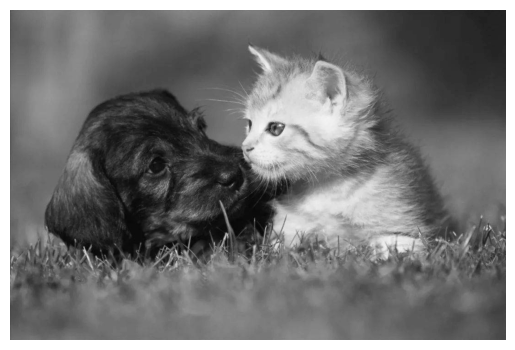

In [5]:
image = cv2.imread('./images/dog_cat.jpeg')  #打开照片
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)             #从RGB图像转化为一个灰度图像
plt.imshow(image,cmap='gray')
plt.axis('off')


In [7]:
[height,width] = [image.shape[0], image.shape[1]]  
#降低分辨率
image1 = cv2.pyrDown(image)                                 #压缩至原来1/2大小(平滑图片并下采样)
image2 = cv2.pyrDown(image1)                                #压缩图像1至1/2大小
image3 = cv2.pyrDown(image2)                                #压缩图像2至1/2大小
image1 = cv2.resize(image1, (width, height))                #放大至原来尺寸（图像分辨率依然被压缩）
image2 = cv2.resize(image2, (width, height))                #放大至原来尺寸
image3 = cv2.resize(image3, (width, height))                #放大至原来尺寸


#量化
new_img_8 = np.zeros((height, width))                       #创建量化矩阵预备
new_img_6 = np.zeros((height, width))
new_img_4 = np.zeros((height, width))
new_img_2 = np.zeros((height, width))

new_img_2 = image/127.5                                     #255/2（量化层数是2）
new_img_2 = np.trunc(new_img_2)                             #化为整数
new_img_2 = new_img_2*127.5                                 #量化等级为2

new_img_4 = image/63.75                                     #255/4（量化层数是4）
new_img_4 = np.trunc(new_img_4)                             #化为整数
new_img_4 = new_img_4*63.75                                 #量化等级为4

new_img_6 = image/42.5                                      #255/6（量化整数是6）
new_img_6 = np.trunc(new_img_6)                             #化为整数
new_img_6 = image*42.5                                      #量化等级为6

new_img_8 = image/31.875                                    #255/8（量化层数是8）
new_img_8 = np.trunc(new_img_8)                             #化为整数
new_img_8 = image*31.875                                    #量化等级为8


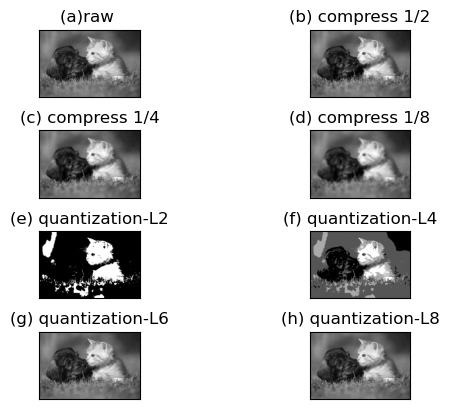

In [20]:
# 显示图像
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.5)
titles = ['(a)raw ', '(b) compress 1/2', '(c) compress 1/4',
          '(d) compress 1/8', '(e) quantization-L2', '(f) quantization-L4', '(g) quantization-L6',
          '(h) quantization-L8']
images = [image, image1, image2, image3,
          new_img_2, new_img_4, new_img_6, new_img_8]
for i in range(8):
    plt.subplot(4, 2, i+1), plt.imshow(images[i], 'gray'),
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
